In [1]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_dir = os.path.dirname(parent_dir)
cwd = parent_dir
sys.path.append(parent_dir)
project_root = parent_dir
print(parent_dir)
import polyscope.imgui as psim
import scipy as sp
import numpy as np
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import jax.random as jrandom
import jax.nn as nn
import jax.lax as lax
import jax.random as jrandom
import jax.nn as nn
import jax.lax as lax
import os
import jax.experimental.sparse as jsp
from scipy.sparse import diags, csr_matrix
from src.dataGenerator.spherical_data_generator import *
from src.utils.sht_helper import *
from src.stochastics.sde import *
from src.stochastics.sde_solver import *
import matplotlib.pyplot as plt
import random
import src.training.trainer as Trainer
from flax.training import checkpoints
from src.models.neural_operator import CTShapeSFNO
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import open3d as o3d
def get_random_int():
    return random.randint(0, 1000000)

/home/zjc/PycharmProjects/ShapeSphericalFNO/ShapeSphericalFNO
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


PointCloud with 100000 points.


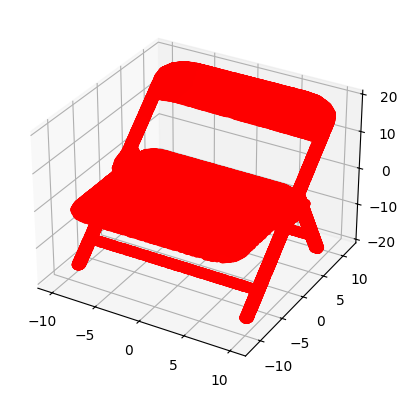

In [2]:
# load modelNet dataset
chair_test = o3d.io.read_triangle_mesh(project_root + "/data/modelNet/ModelNet10/chair/train/chair_0001.off")
chair_test_pcd = chair_test.sample_points_uniformly(number_of_points=100000)
print(chair_test_pcd)
np.asarray(chair_test_pcd.points)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.asarray(chair_test_pcd.points)[:, 0], np.asarray(chair_test_pcd.points)[:, 1], np.asarray(chair_test_pcd.points)[:, 2], c='r', marker='o')
plt.show()

(50, 99, 3)


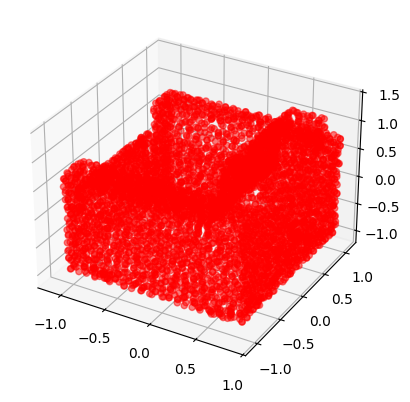

In [3]:
data_generator = S2ManifoldDataGenerator(sampling="gl", manifold_type='real_data', file_path=project_root + "/data/modelNet/ModelNet10/sofa/train/sofa_0003.off", scale=0.7, src_type='mesh')
test_pcd = data_generator.generate_data(50,1)[0]
print(test_pcd.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_pcd[:,:, 0], test_pcd[:,:, 1], test_pcd[:,:, 2], c='r', marker='o',alpha=0.5)
plt.show()

(50, 99, 3)


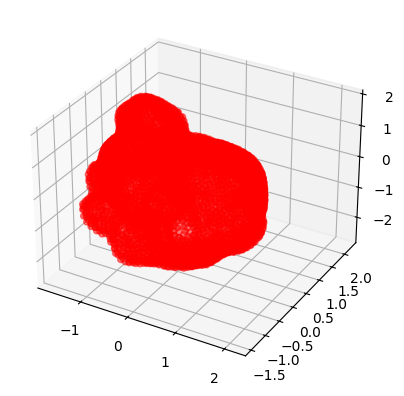

In [4]:
data_generator = S2ManifoldDataGenerator(sampling="gl", manifold_type='real_data', file_path=project_root + "/data/test_meshes/bunny.obj", scale=1.0, src_type='mesh')
test_pcd = data_generator.generate_data(50,1)[0]
print(test_pcd.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_pcd[:,:, 0], test_pcd[:,:, 1], test_pcd[:,:, 2], c='r', marker='o',alpha=0.5)
plt.show()

In [ ]:
late